# Lab 7: Probabilities and Sampling

Welcome to Lab 7. In this lab we will learn about [randomness](https://inferentialthinking.com/chapters/09/Randomness.html) and [sampling](https://inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions.html) strategies.


The data used in this lab will contain salary data and statistics for basketball players from the 2021-2022 NBA season. These data were collected from [basketball-reference](http://www.basketball-reference.com) and [spotrac](http://www.spotrac.com).

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)

# style
# plt.style.use('fivethirtyeight')
plt.style.use("ggplot")

## Your Name: Caroline Petersen

## 1. Poker

In this section we study probabilities of in the [game of poker](https://en.wikipedia.org/wiki/Poker).

The game is played with a [standard 52-card deck](https://en.wikipedia.org/wiki/Standard_52-card_deck).  Each card has a rank and a suit.  Let's create a deck as a data frame.

We will also add a value for each card, which can also be used to get cards in sequence.  (We will have strings for our ranks, since we have `"A"` for ace, for example.  The values can be used for ordering the cards in sequence, for instance, with a hand with `[9, 10, J, Q, K]` or `[10, J, Q, K, A]`.)

For that we will use a [np.repeat](https://numpy.org/doc/stable/reference/generated/numpy.repeat.html) and [np.tile](https://numpy.org/doc/stable/reference/generated/numpy.tile.html).

In [123]:
ranks = ["A"] + [str(i) for i in range(2, 11)] + ["J", "Q", "K"]
suits = ["Diamonds", "Clubs", "Hearts", "Spades"]
values = [13] + list(range(1, 13))
deck = pd.DataFrame({"Rank": np.tile(ranks, 4), "Suit": np.repeat(suits, 13), "Value": np.tile(values, 4)})
deck

,Rank,Suit,Value
0,A,Diamonds,13
1,2,Diamonds,1
2,3,Diamonds,2
3,4,Diamonds,3
4,5,Diamonds,4
5,6,Diamonds,5
6,7,Diamonds,6
7,8,Diamonds,7
8,9,Diamonds,8
9,10,Diamonds,9


**Question 1.1:** Write a function that selects five random cards from the deck, and then sorts them according to values, and sorting alphabetically by suits when we have the same values.

*Hint:* [sort_values](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) can take a *list* of labels by which to sort the data frame.

In [124]:
def draw_five():
    "Draws five cards from the deck."
    return deck.sample(5).sort_values(["Value", "Suit"])

# test
draw_five()

,Rank,Suit,Value
2,3,Diamonds,2
44,6,Spades,5
32,7,Hearts,6
48,10,Spades,9
12,K,Diamonds,12


There are many [poker hands](https://en.wikipedia.org/wiki/List_of_poker_hands), and it is not hard to compute the exact probability of each.  The highest valued hands are extremely unlikely.  For instance, the probability of getting *four of a kind* (four cards with the same rank) is 

$$
\frac{13 \cdot 48}{\displaystyle \binom{52}{5}} = \frac{624}{2{,}598{,}960} = \frac{1}{4{,}165} \approx 0.00024 = 0.0240\%.
$$

A *straight-flush* (five cards in sequence and with the same suit) is even less likely, with a probability of

$$
\frac{9 \cdot 4}{\displaystyle \binom{52}{5}} = \frac{36}{2{,}598{,}960} = \frac{3}{216{,}580} \approx 0.00001385 = 0.001385\%.
$$

We will focus on lower valued hands, which have a higher probability.  We will look at two hands:

  * **Two pairs**: two cards of matching rank, another two cards matching a different rank, and a third card with a rank different from the previous two.  Suits don't matter;
  * **Straight**: the ranks in sequence of values of increasing order, like, `[3, 4, 5, 6, 7]`, or `[9, 10, J, K, A]` (we assume `A` comes after `K` and not before `2`), but *not all suits the same*!  (That would be a *straight flush* instead.)

---

### `value_counts`

In solving the problems below, the pandas methods [value_counts](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) can come handy.  Let's see it in action:

In [125]:
df = pd.DataFrame({"Col1": np.random.choice(np.arange(1, 5), 20), "Col2": np.random.choice(np.array(["A", "B", "C", "D"]), 20)})
df

,Col1,Col2
0,1,B
1,1,B
2,3,B
3,3,A
4,1,A
5,4,A
6,4,C
7,2,C
8,3,A
9,4,A


We use `value_counts` to see how many times each value occur in a column:

In [126]:
df["Col1"].value_counts()

1    6
3    6
4    6
2    2
Name: Col1, dtype: int64

In [127]:
df["Col2"].value_counts()

A    7
C    6
B    5
D    2
Name: Col2, dtype: int64

Note that the *index* (on the left) is the value of the given column, and the entries (of the series) is the count for each value.  By default, it is sorted by the number of occurrences (i.e., counts) in decreasing order.

We can make this resulting series into an array by using `to_numpy` (the index is dropped):

In [128]:
df["Col2"].value_counts().to_numpy()

array([7, 6, 5, 2])

---

### Comparing Arrays

Remember that if we want to check if two arrays are equal, we don't use `==`:

In [129]:
a = np.array([1, 2, 3])
b = np.array([1, 2, 3])
c = np.array([1, 2, 4])

Clearly, `a` and `b` are equal, but `c` is different.

If we try to use `==`:

In [130]:
a == b

array([ True,  True,  True])

In [131]:
a == c

array([ True,  True, False])

We use instead `np.array_equal`:

In [132]:
np.array_equal(a, b)

True

In [133]:
np.array_equal(a, c)

False

---

**Question 1.2:** Write a function that returns `True` if `hand` is two pairs, and `False` otherwise.

*Hint:* Use `value_counts` and `np.array_equal`.  And careful: `[2, 2, 3, 3, 3]` does not count as two pairs.  (It is a *full house*.)

In [134]:
def is_two_pairs(hand):
    """Check if hand is two pairs."""
    return np.array_equal(hand["Rank"].value_counts().to_numpy(), np.array([2, 2, 1]))

Let's test it.  The first should return `True`, the others should return `False`:

In [135]:
print(is_two_pairs(deck.iloc[[2, 43, 50, 28, 30]]))
print(is_two_pairs(deck.iloc[[2, 28, 41, 20, 33]]))
print(is_two_pairs(deck.iloc[[2, 28, 41, 43, 50]]))
print(is_two_pairs(deck.iloc[[2, 28, 30, 40, 50]]))
print(is_two_pairs(deck.iloc[[2, 20, 41, 43, 50]]))

True
False
False
False
False


**Question 1.3:** Write a function that returns `True` if `hand` is a straight, and `False` otherwise.

*Hint:* Here you need to check if the *values* of the hand is made of 5 consecutive numbers *and* that not all suits are the same.  
  * For the latter, you can use `value_counts` again.  (If the suits are all the same, you can return `False` right away.)
  * For the former, you can order the array of values of `hand`, look at its first element (which should be the minimum, since you've ordered it), and see if the array is equal to another one of length five that starts at the same value and made of consecutive numbers.  (You can use `np.arange` to create this last array.)

In [136]:
def is_straight(hand):
    """Check if hand is a straight."""
    if len(hand["Suit"].value_counts()) == 1:
        return False
    
    values = np.sort(hand["Value"].to_numpy())
    return np.array_equal(values, np.arange(values[0], values[0] + 5))

Let's test it.  The first *two* should return `True`, the others should return `False`:

In [137]:
print(is_straight(deck.iloc[[20, 24, 23, 21, 35]]))
print(is_straight(deck.iloc[[36, 51, 26, 37, 9]]))
print(is_straight(deck.iloc[[39, 14, 15, 16, 17]]))
print(is_straight(deck.iloc[[11, 12, 13, 14, 15]]))
print(is_straight(deck.iloc[[2, 3, 17, 19, 20]]))

True
True
False
False
False


**Question 1.4:** Write a function that takes an argument `number_of_draws` that simulates drawing five cards `number_of_draws` times, and returns a list where the first entry is the number of two pairs in the simulation, and the second is the number of straights.


In [138]:
def two_pairs_straights(number_of_draws):
    """Simulates drawing 5 cards number_of_draws times and returns
    the number of two pairs and straights."""
    # initialize the count
    number_of_two_pairs = 0
    number_of_straights = 0

    # loop
    for i in range(number_of_draws):
        # draw hand
        hand = draw_five()

        # check if two pairs
        if is_two_pairs(hand):
            number_of_two_pairs += 1

        # check if straight
        if is_straight(hand):
            number_of_straights += 1
        
    return [number_of_two_pairs, number_of_straights]

We can now estimate the probabilities of drawing a hand with two pairs and straight by drawing a large number of hands, counting the numbers of two pairs and straights, and dividing these by the number of draws.

*Note:* 
  * The actual probabilities are about $4.75\%$ and $0.35\%$, but you might not get very close to these with "only" $10{,}000$ draws.
  * This takes a minute.  When testing, you can change the value of `number_of_draws` to something smaller (like $1{,}000$ or even $500$), but the approximations will be worse.  *Don't forget to make `number_of_draws` $10{,}000$ again when you are done testing!*

In [139]:
number_of_draws = 10_000

number_of_two_pairs, number_of_straights = two_pairs_straights(number_of_draws)

# probabilities
prob_two_pairs = number_of_two_pairs / number_of_draws
prob_straight = number_of_straights / number_of_draws

print(f"Probability of drawing two pairs: {prob_two_pairs:.2%}.")
print(f"Probability of drawing straight:  {prob_straight:.2%}.")

Probability of drawing two pairs: 4.32%.
Probability of drawing straight:  0.38%.


## 2. Sampling

Run the cell below to load the player and salary data.

In [140]:
player_data = pd.read_csv("player_data.csv").drop_duplicates(keep="last")
salary_data = pd.read_csv("salary_data.csv").drop_duplicates(keep="last")

full_data = player_data.merge(salary_data, on="PlayerName")
full_data.head(10)

,PlayerName,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points,Salary
0,Trae Young,23,ATL,42,166,390,41,4,174,1174,8326471
1,Jayson Tatum,23,BOS,44,378,171,41,33,131,1136,28103500
2,Giannis Antetokounmpo,27,MIL,39,440,235,40,58,136,1116,39344900
3,Stephen Curry,33,GSW,43,228,267,61,20,138,1116,45780966
4,DeMar DeRozan,32,CHI,42,209,200,34,15,92,1105,26000000
5,Kevin Durant,33,BRK,36,267,207,28,34,107,1053,40918900
6,Donovan Mitchell,25,UTA,40,158,206,64,9,118,1020,28103500
7,LeBron James,37,LAL,35,269,221,56,38,111,1014,41180544
8,Joel Embiid,27,PHI,35,374,149,35,48,102,1003,31579390
9,Zach LaVine,26,CHI,39,188,165,25,14,111,971,19500000


Imagine that we have data only on a subset of the players.  Then we want to make a *statistical inference* about the larger underlying population using the smaller sample. 

**Question 2.1:**. Complete the `histograms` function, which takes a data frame with columns `Age` and `Salary` and draws a *density* histogram for each one. Use the `min` and `max` methods (or functions) to pick the bin boundaries so that all data appears for any data frame passed to your function. For bin sizes, try 2 years for `Age` and 1,000,000 for `Salary`).

*Hint:* Make sure your bins include the maxima!  Remember that `np.arange(a, b, step)` *never* includes `b`.  To make sure that it does include `b`, you need `np.arange(a, b + step, step)`.

In [155]:
def histograms(df):
    """Display the histograms for Age and Salary columns from a data frame."""
    ages = df["Age"]
    salaries = df["Salary"]
    
    # bins
    age_bins = np.arange(ages.min(), ages.max() + 2, 2)
    salary_bins = np.arange(salaries.min(), salaries.max() + 1_000_000, 1_000_000)
    
    # Age histogram
    df.hist(column="Age", bins=age_bins, density=True, color='b')
    
    # Salary histogram
    df.hist(column="Salary", bins=salary_bins, density=True, color='g')

Now run the cell below.  It should display *two* histograms.

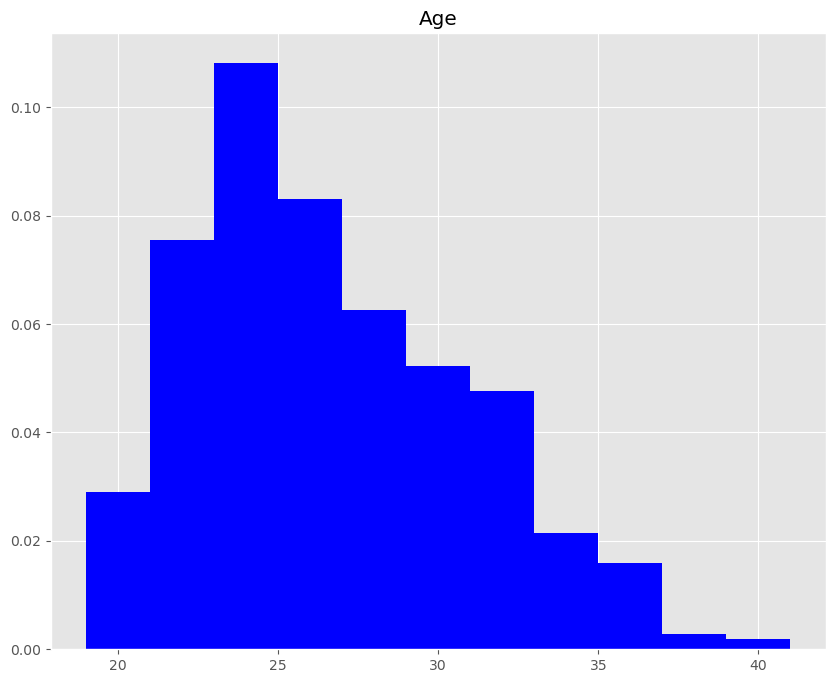

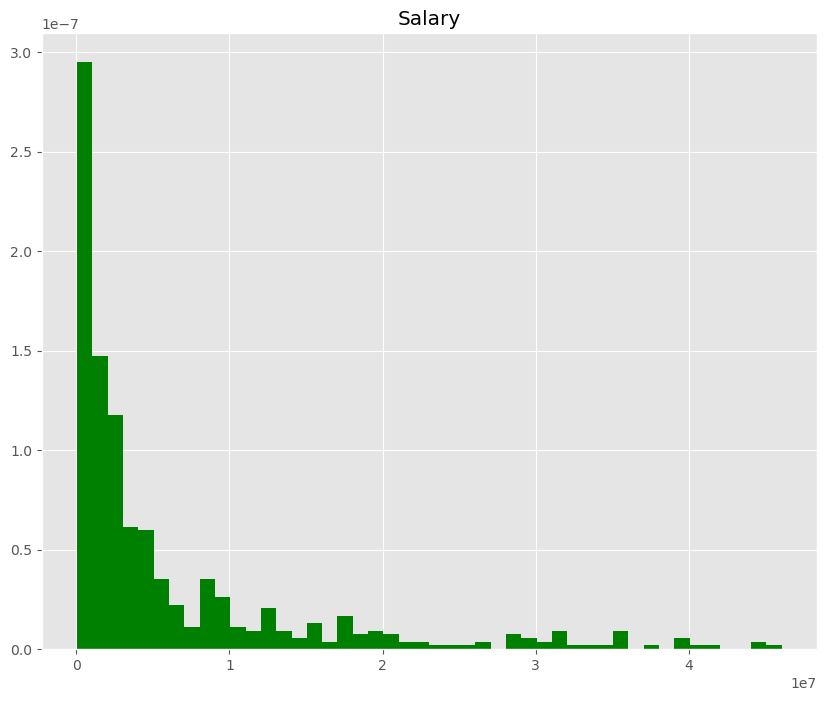

In [156]:
histograms(full_data)

**Question 2.2:**. Create a function called `compute_statistics` that takes a data frame containing ages and salaries (labeled as "Age" and "Salary", respectively) and:
- draws a histogram of ages,
- draws a histogram of salaries,
- returns a two-element *list* containing the average age and average salary.

Note that you can call your `histograms` function to draw the histograms.

[26.151119402985074, 6205311.003731343]

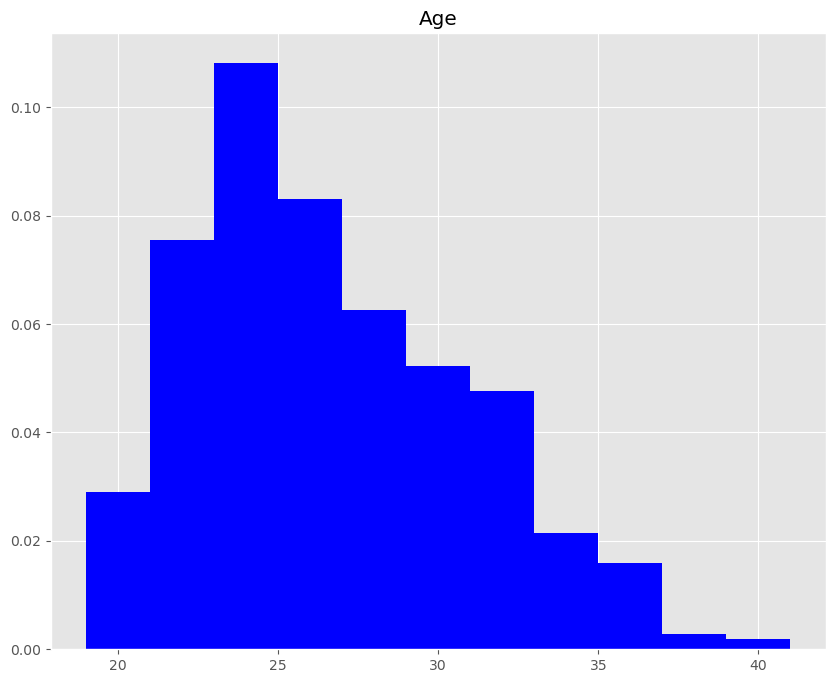

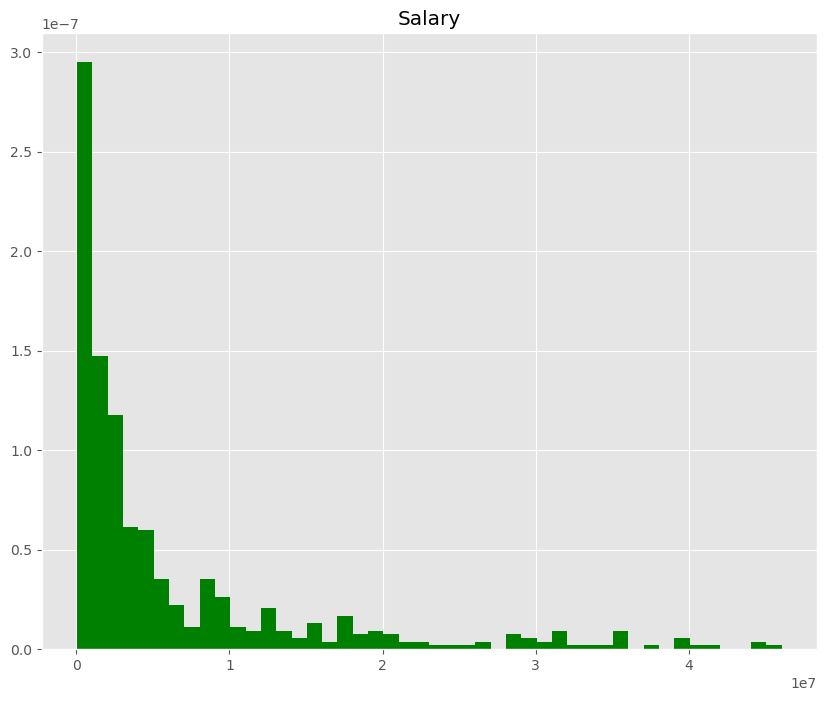

In [157]:
def compute_statistics(age_and_salary_data):
    """Display the histograms for Age and Salary and returns a list with average Age and Salary."""
    histograms(age_and_salary_data)  # display the histograms for Age and Salary
    aver_age = age_and_salary_data["Age"].mean()  # average Age
    aver_salary = age_and_salary_data["Salary"].mean()  # average Salary
    return [aver_age, aver_salary]


full_stats = compute_statistics(full_data)
full_stats

### Convenience sampling

One sampling methodology, which is **generally a bad idea**, is to choose players who are somehow convenient to sample.  This is called *convenience sampling*. Suppose experienced players won't answer your surveys, so  you survey only *relatively new* players with ages less than 22.

**Question 2.3:**  Assign `convenience_sample_data` to a subset of `full_data` that contains only the rows for players under the age of 22.

In [158]:
convenience_sample = full_data[full_data["Age"] < 22]
convenience_sample

,PlayerName,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points,Salary
19,Anthony Edwards,20,MIN,40,203,143,61,26,122,889,10245480
33,LaMelo Ball,20,CHO,40,292,305,62,18,124,760,8231760
36,Franz Wagner,20,ORL,48,228,138,46,26,78,738,5007840
55,Tyrese Maxey,21,PHI,39,134,174,26,20,46,652,2602920
64,Tyrese Haliburton,21,SAC,44,173,316,72,31,98,615,4023600
...,...,...,...,...,...,...,...,...,...,...,...
468,Vernon Carey Jr.,20,CHO,4,5,0,1,0,1,8,1517981
498,Deividas Sirvydis,21,DET,3,6,1,3,1,0,3,85578
505,Vit Krejci,21,OKC,3,3,0,0,0,1,2,925258
508,Jaden Springer,19,PHI,2,2,0,0,2,1,2,2023680


**Question 2.4:** Assign `convenience_stats` to a list of the average age and average salary of your convenience sample, using the `compute_statistics` function.  Since they're computed on a sample, these are called *sample averages*.  (It's OK if the histograms are also displayed.)

[20.375, 3648979.515625]

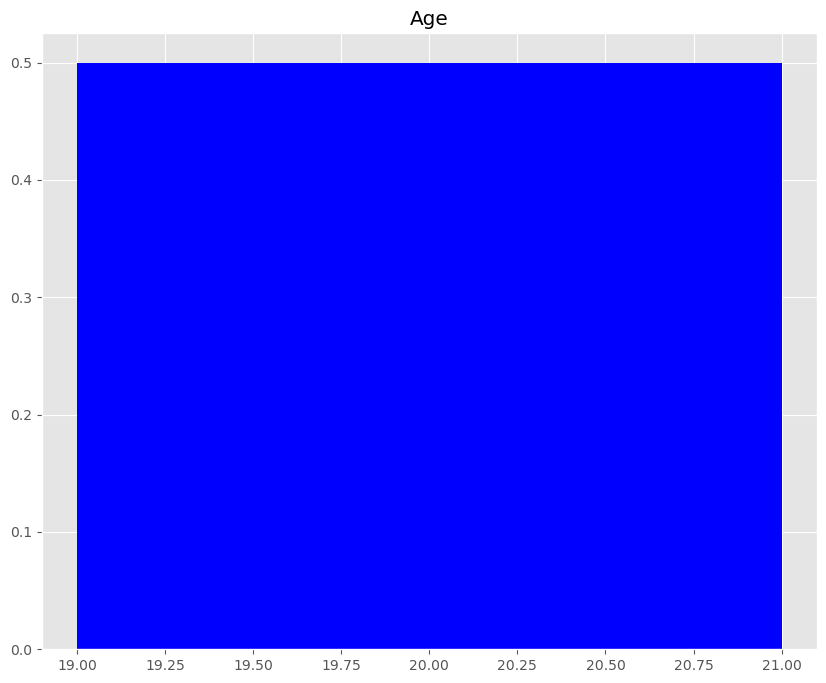

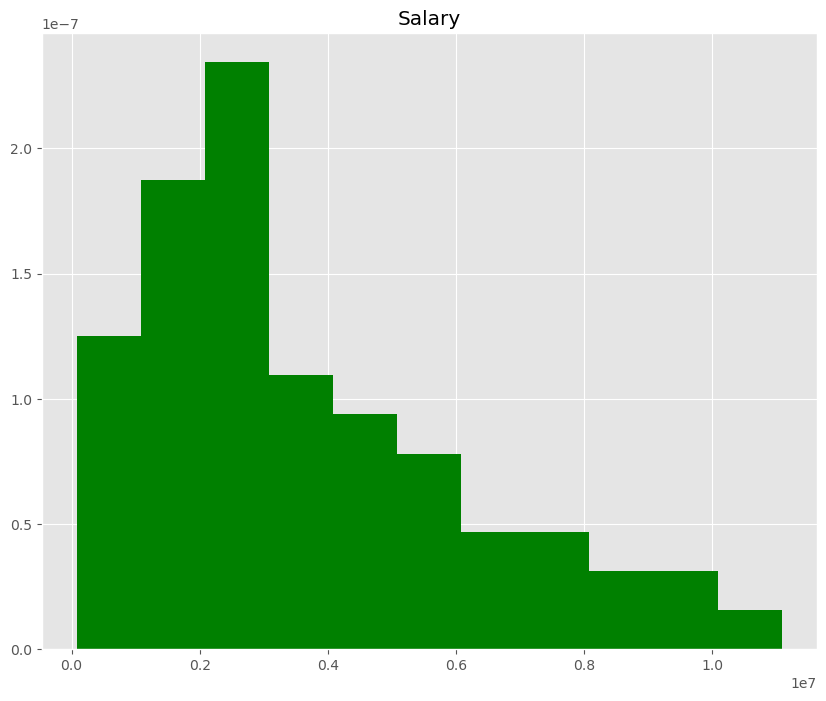

In [159]:
convenience_stats = compute_statistics(convenience_sample)
convenience_stats

---

Next, we'll compare the convenience sample salaries with the full data salaries in a single histogram. The following cell should not require any changes; just run it.

The highest salary between the convenience sample and all players is 45780966.


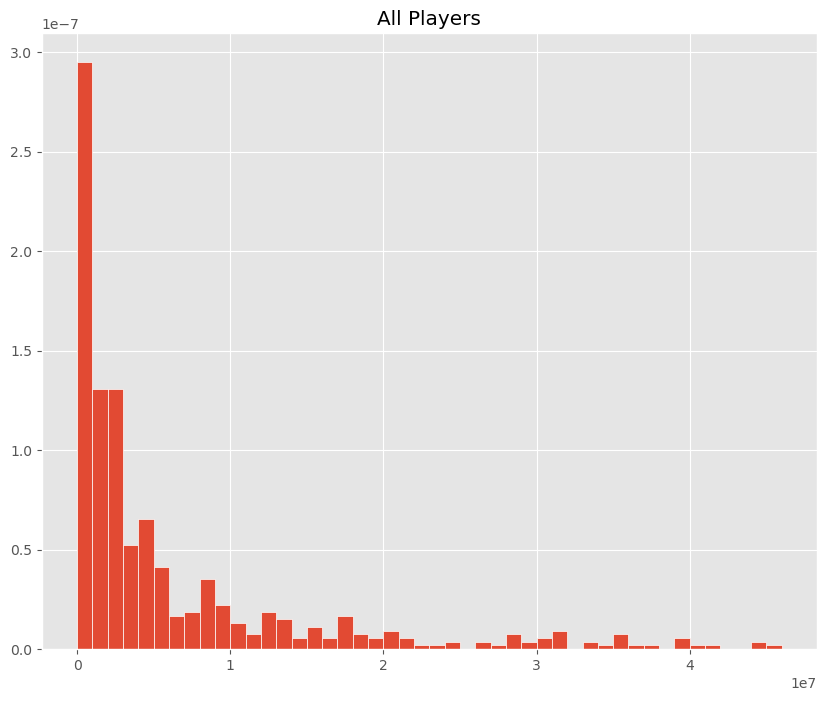

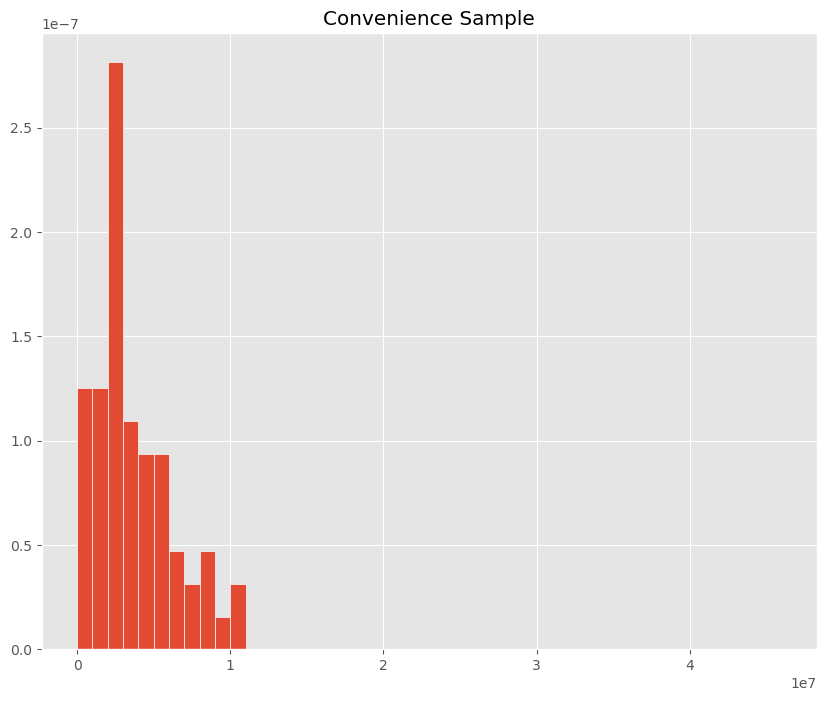

In [160]:
def compare_salaries(first, second, first_title, second_title):
    """Compare the salaries in two data frames."""
    max_salary = max(first["Salary"].max(), second["Salary"].max())
    bins = np.arange(0, max_salary + 1e6, 1e6)
    first.hist("Salary", bins=bins, density=True, ec="white")
    plt.title(first_title)
    second.hist("Salary", bins=bins, density=True, ec="white")
    plt.title(second_title)
    return max_salary


max_salary = compare_salaries(full_data, convenience_sample, "All Players", "Convenience Sample")
print(f"The highest salary between the convenience sample and all players is {max_salary}.")

### Simple random sampling

A more principled approach is to sample uniformly at random from the players.  If we ensure that each player is selected at most once, this is a *simple random sample without replacement*, sometimes abbreviated to "SRSWOR".  Imagine writing down each player's name on a card, putting the cards in an urn, and shuffling the urn.  Then, pull out cards one by one and set them aside, stopping when the specified *sample size* is reached.

**Question 2.5:** Create random samples (without replacement) with 44 and 100 players, then use `compute_statistics` to complete the code below.  It should run the same analyses on the small and large samples that you previously ran on the full dataset and on the convenience sample.

Full data stats:                   26.15 average age,  $6,205,311.00 average salary.
Convenience data stats:            20.38 average age,  $3,648,979.52 average salary.
Small simple random sample stats:  26.07 average age,  $4,736,004.70 average salary.
Large simple random sample stats:  26.08 average age,  $6,477,553.91 average salary.


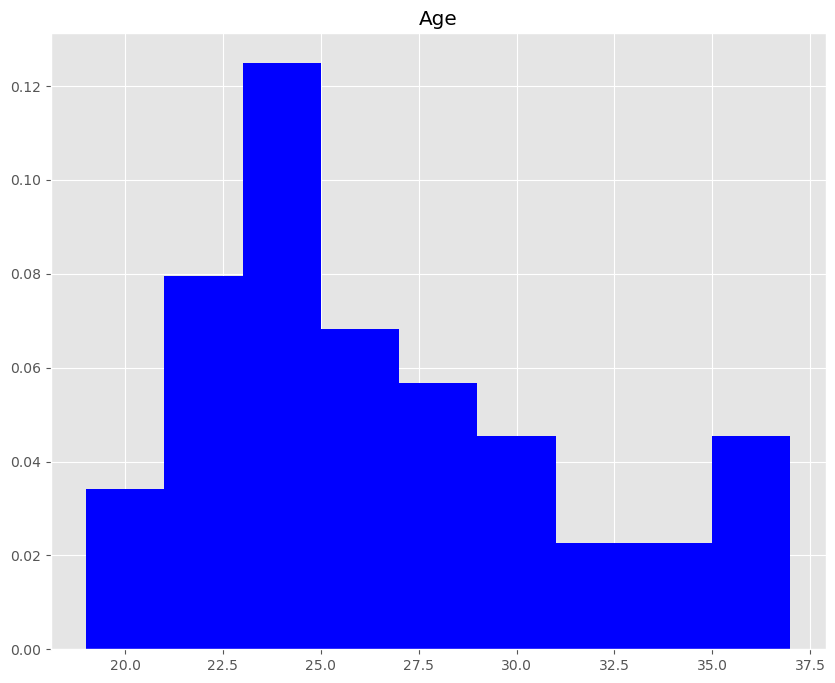

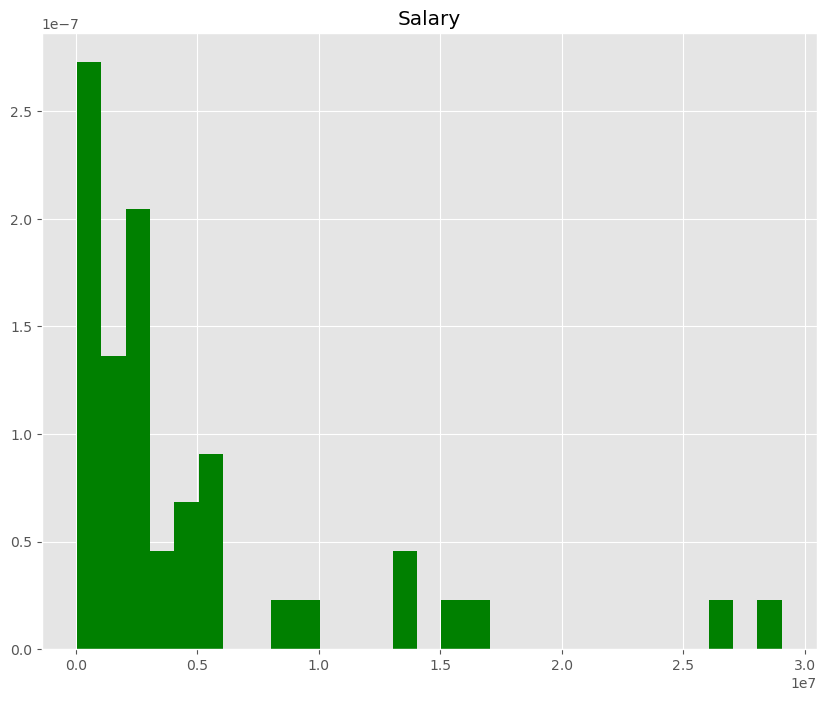

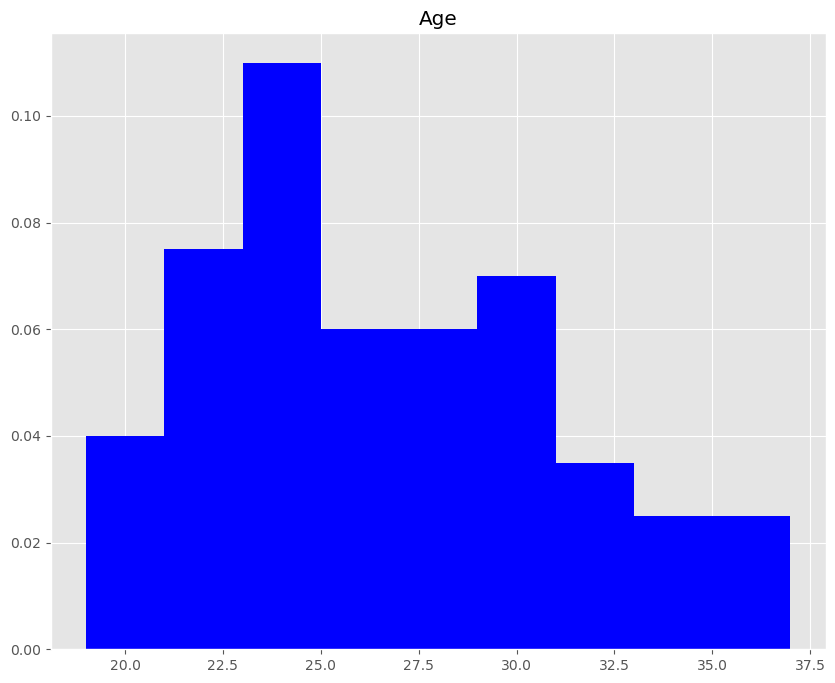

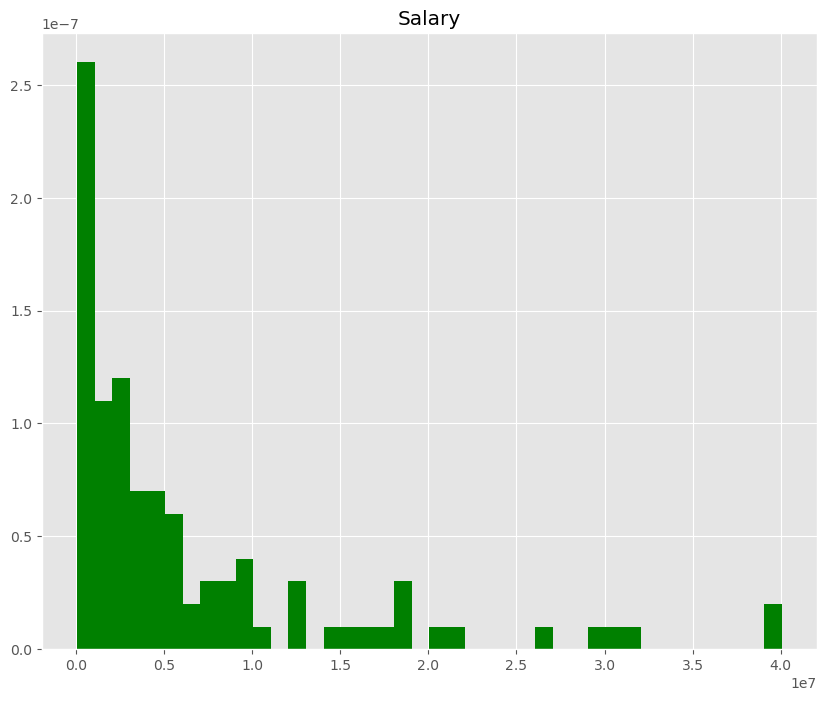

In [161]:
# random sample with 44 players
small_srswor_data = full_data.sample(44)

# statistics for small_srswor_data data
small_stats = compute_statistics(small_srswor_data)

# random sample with 100 players
large_srswor_data = full_data.sample(100)


# statistics for small_srswor_data data
large_stats = compute_statistics(large_srswor_data)

# print the results
print(f"Full data stats:                   {full_stats[0]:.2f} average age,  ${full_stats[1]:,.2f} average salary.")
print(f"Convenience data stats:            {convenience_stats[0]:.2f} average age,  ${convenience_stats[1]:,.2f} average salary.")
print(f"Small simple random sample stats:  {small_stats[0]:.2f} average age,  ${small_stats[1]:,.2f} average salary.")
print(f"Large simple random sample stats:  {large_stats[0]:.2f} average age,  ${large_stats[1]:,.2f} average salary.")

## 3. Probability

We are going to study probabilities in a game in which a player rolls three dice.

**Question 3.1:** Create a function that simulates the roll of `num_dice` dice, each with `num_faces` faces numbered from 1 to `num_faces`.  It takes the number of dice (`num_dice`) and the number of faces (`num_faces`) as its arguments and returns an array (of legth `num_dice`) with a random result (a number between 1 and `num_faces`) for each die.

In [162]:
def roll_dice(num_dice, num_faces):
    """Simulate roll of num_dice dice with num_faces face."""
    # array of possible results
    possible_results = np.arange(1, num_faces +1)
    
    return np.random.choice(possible_results, num_dice)

You can test it by running the cell below a few times.  (You can change `num_dice` and `num_faces` to test different numbers of dice and faces.)

In [163]:
num_dice = 3
num_faces = 6
roll_dice(num_dice, num_faces)

array([3, 1, 2])

**Question 3.2:** Complete the code below to create a data frame called `thousand_rolls` that contains the simulation for a thousand rolls of three six-face dice.  The columns are called `Die 1`, `Die 2`, `Die 3` and contain the corresponding roll of the die.

*Hint:* We will use the most efficient way here.  We create arrays `die1`, `die2`, `die3` that will contain the columns of the data frame.  We initialize them as arrays with 1,000 zeros (of type `int`) using [np.zeros](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html).

Then, we have a `for` loop with 1,000 iterations where we change the zeros of each column to the results of the rolls.  (Use your `roll_dice` function to simulate a single roll!)

When the loop ends, we create the data frame with the completed columns.

**Note:** There is an even more efficient way to do this in this case.  Since the rolls of the dice are *independent*, we could simply create the columns with
```python
die1 = roll_dice(1000, 6)
die2 = roll_dice(1000, 6)
die3 = roll_dice(1000, 6)
```
**You cannot do that here**, though!  You cannot always take this shortcut, and I want you to practice creating simulation data frames sample by sample, which is a general method.

In [164]:
# number of rolls
num_rolls = 1_000

# initialize the columns
die1 = np.zeros(num_rolls, dtype=int)
die2 = np.zeros(num_rolls, dtype=int)
die3 = np.zeros(num_rolls, dtype=int)

# perform rolls and add results to columns
for i in range(num_rolls):
    # roll
    roll_result = roll_dice(3, 6)

    # add results to the columns
    die1[i] = roll_result[0]
    die2[i] = roll_result[1]
    die3[i] = roll_result[2]

# create the data frame
thousand_rolls = pd.DataFrame({"Die 1": die1, "Die 2": die2, "Die 3": die3})

thousand_rolls

,Die 1,Die 2,Die 3
0,4,2,3
1,6,2,4
2,4,4,3
3,2,6,6
4,1,1,3
...,...,...,...
995,5,2,6
996,2,1,3
997,5,6,2
998,5,5,6


**Question 3.3:** Add a column, labeled "Sum", with the sum of the values of the three dice (for each row).

In [165]:
thousand_rolls["Sum"] = (
    thousand_rolls["Die 1"] + thousand_rolls["Die 2"] + thousand_rolls["Die 3"]
)
thousand_rolls

,Die 1,Die 2,Die 3,Sum
0,4,2,3,9
1,6,2,4,12
2,4,4,3,11
3,2,6,6,14
4,1,1,3,5
...,...,...,...,...
995,5,2,6,13
996,2,1,3,6
997,5,6,2,13
998,5,5,6,16


**Question 3.4:** Create a density histogram approximating the probabilities for the resulting sum of a roll (the sum of the dice).  Note that the minimum roll is 3 and the maximum is 18.  Use bins 2.5, 3.5, 4.5, ... 18.5 (so that the roll value is in the middle of the bars).

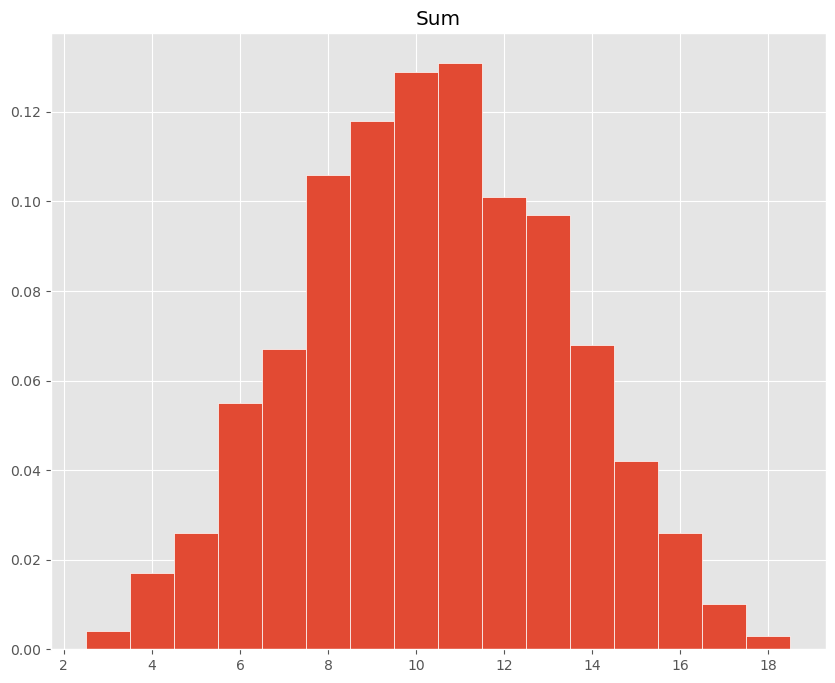

In [166]:
# array with 2.5, 3.5, 4.5, ..., 17.5, 18.5
bins = np.arange(2.5, 19.5)

# probability histogram
thousand_rolls.hist("Sum", bins=bins, density=True, ec="white")
plt.show()

Now suppose that in this game the player can roll again if either the dice all have the same number face up or if their sum is 15 or more.  We want to estimate the probability of that happening based on the data in `thousand_rolls`.

**Question 3.5:** Filter the data frame `thousand_rolls` to have only rows that results in the player rolling again, i.e., the three dice match or the sum is 15 or more.

*Hint:* Both `.loc` and `.query` work.  The latter is much simpler here, so I recommend you use it!  

Note that since the column labels have spaces, you need to use back ticks for the columns around the column names (with spaces).  For instance, to filter the `thousand_rows` data frame for rows in which both `Die 1` and `Die 3` are greater than 4, we can do:

```python
thousand_rolls.query("`Die 1` > 4 and `Die 3` > 4")
```

In [167]:
roll_again = thousand_rolls.query("(`Die 1` == `Die 2` and `Die 2` == `Die 3`) or (`Die 1` + `Die 2` + `Die 3` >= 15)")

roll_again

,Die 1,Die 2,Die 3,Sum
6,5,6,6,17
7,6,4,5,15
22,3,6,6,15
29,3,3,3,9
35,5,5,5,15
...,...,...,...,...
949,6,6,5,17
968,5,6,6,17
975,1,1,1,3
978,5,5,5,15


**Question 3.6:** We now estimate the probability of a player rolling again.  Pretend that we do not know that the `thousand_rolls` correspond to 1,000 rolls.  (This way the code works if you change the number of rolls.)  First find from the data frame itself the number of rolls (which is simply the number of rows), then find the number of occurrences that result in the player rolling again inside it.  (*Hint:* Use the `roll_again` data frame.)  The estimated probability is shown at the end.

In [168]:
total_num_rolls = len(thousand_rolls)

roll_again_rolls = len(roll_again)

roll_again_prob = roll_again_rolls / total_num_rolls

print(f"The estimated probability of rolling again is: {roll_again_prob:,.2%}")

The estimated probability of rolling again is: 10.20%


**Note:** With some math we can actually compute the exact probability: it is $\dfrac{24}{6^3} \approx 11.11\%$.

## 4. Submission

You're finished with lab 7. **To submit this lab**, please download your notebook as a .ipynb file and submit in Canvas under Lab 7 (under Assignments). To export, go to the toolbar at the top of this page, click File > Download. Then, go to our class's Canvas page and upload your file under "Lab 7".

For easy identification, **please add your surname to the file**, as in: lab_07_DS201_Name.ipynb